In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.selectors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


# Read Hermes-3

In [2]:
db = CaseDB()

toload = [ 
    dict(name="2e19", id="d42acb-with_guards", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)
    
    

- Reading case d42acb-with_guards
-----------------------
- Looking for squash file
- Squash file found. squash date 09/03/2024, 10:49:23, dmp file date 09/03/2024, 10:28:10


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


In [3]:
hr = dict()
for name in cs.keys(): 
    print(name)
    hr[name] = Hermesdata()
    ds = cs[name].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    hr[name].read_case(ds)

    
    ds = cs[name].ds
    # ds = calculate_radial_fluxes(ds, new_afn = True)
    # ds = calculate_target_fluxes(ds)
    # ds = reverse_pfr_fluxes(ds)

2e19
None 0.001
None 0.003
None 0.015
None 0.03


# Read SOLEDGE

In [4]:
soledgecases = {
    # "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    # "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    # "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    # "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    # "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    # "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    # sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    # sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    # sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    # sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    # sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")

sl["tightwall_2e19"].regions["outer_fieldline_0.030_parallel"]

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


Index(['Dense', 'Tempe', 'velocitye', 'Me', 'IRade', '(Dens*Temp^1.5)e',
       'pi_parallele', 'Alphame', 'Alphape', 'Sne', 'SGe', 'SEe',
       'count_Zhdanov_min_ne', 'count_clean_min_ne', 'count_clean_min_te',
       'count_coupling_min_te', 'IRad1e', 'Zeff', 'SE1e', 'TotRad', 'TotNRad',
       'Densi', 'Tempi', 'velocityi', 'Mi', 'IRadi', '(Dens*Temp^1.5)i',
       'pi_paralleli', 'Alphami', 'Alphapi', 'Sni', 'SGi', 'SEi',
       'count_Zhdanov_min_ni', 'count_clean_min_ni', 'count_clean_min_ti',
       'count_coupling_min_ti', 'IRad1i', 'NRadi', 'Nni', 'Tni', 'Pni', 'vxni',
       'vyni', 'vzni', 'Nmi', 'Tmi', 'vxmi', 'vymi', 'vzmi', 'Ntii', 'Ppi',
       'Epi', 'TDensi', 'TDensei', 'FracDensi', 'Cimpi', 'FraceDensi', 'Zavei',
       'TotRadi', 'dist', 'R', 'Z'],
      dtype='object')


,Ne,Te,velocitye,Me,IRade,(Dens*Temp^1.5)e,pi_parallele,Alphame,Alphape,Sne,...,FracDensi,Cimpi,FraceDensi,Zavei,TotRadi,dist,R,Z,M,NVd+
pos,,,,,,,,,,,,,,,,,,,,,
0.000000,4.829859e+18,8.965534,0.000031,0.0,0.0,1.296577e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,842.405533,0.000000,0.764134,0.000000,0.004888,0.000003
0.043289,4.824845e+18,8.965507,0.000104,0.0,0.0,1.295226e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,802.903384,0.043289,0.763822,0.023228,0.016559,0.000011
0.139763,4.802098e+18,8.962101,0.000254,0.0,0.0,1.288385e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1193.362273,0.139763,0.760870,0.074861,0.040657,0.000026
0.235862,4.798190e+18,8.955219,0.000391,0.0,0.0,1.285854e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2327.066544,0.235862,0.754891,0.125626,0.062537,0.000041
0.331765,4.776465e+18,8.945196,0.000521,0.0,0.0,1.277884e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1554.480619,0.331765,0.746471,0.174152,0.083865,0.000054
0.424477,4.764172e+18,8.931966,0.000640,0.0,0.0,1.271769e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1789.481256,0.424477,0.736089,0.220673,0.103316,0.000067
0.519150,4.750339e+18,8.915356,0.000757,0.0,0.0,1.264540e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2865.680218,0.519150,0.723995,0.265484,0.122505,0.000079
0.612414,4.725824e+18,8.896054,0.000866,0.0,0.0,1.253931e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2157.570974,0.612414,0.710662,0.307829,0.141020,0.000090
0.706307,4.705186e+18,8.873822,0.000961,0.0,0.0,1.243778e+20,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2110.622384,0.706307,0.696569,0.347560,0.157355,0.000100


In [5]:
self = SOLEDGEcase(soledgecases["tightwall_2e19"])
dfpol = self.get_1d_poloidal_data(params = self.params, d_from_sep=0.002)
dfpar = self.get_1d_poloidal_data(params = self.params, d_from_sep=0.002, parallel_length = True)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


# Read SOLPS

In [5]:
solpscases = {
    "tightwall_noD2_2e19_spectrum" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_spectra\X.NESEPM=2.0E+19",
    
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    # _ = read_last10s(solpscases[name], save = True)
    # sp[name].read_last10s(solpscases[name])
    sp[name].read_from_case(solpscases[name])

True


# Debug soledge

In [158]:
df = slc.get_1d_poloidal_data(params = ["Mi"], region =  "outer_upper", d_from_sep = 0.030, parallel_length = True)

# Lineplot test!

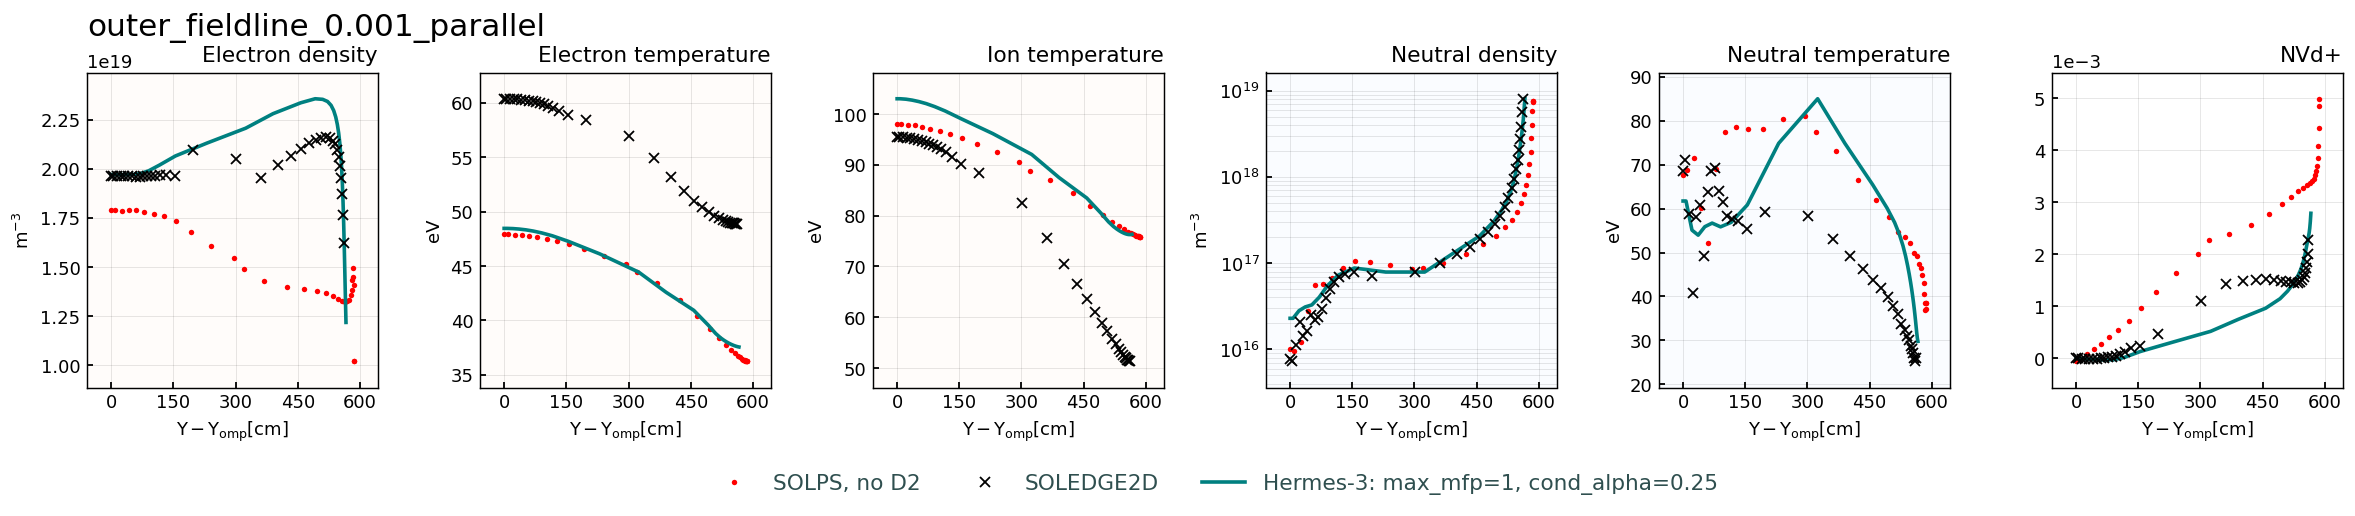

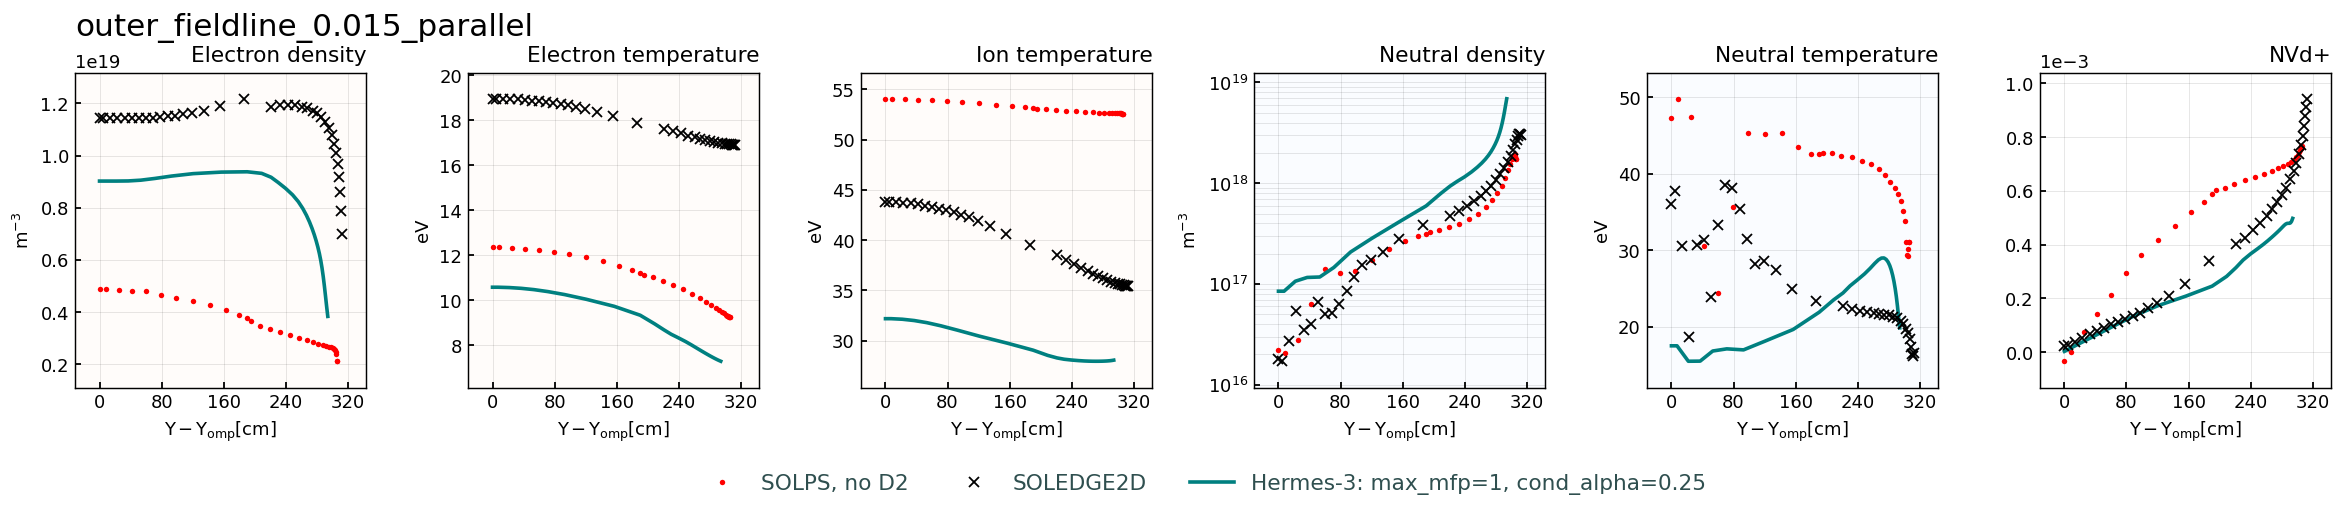

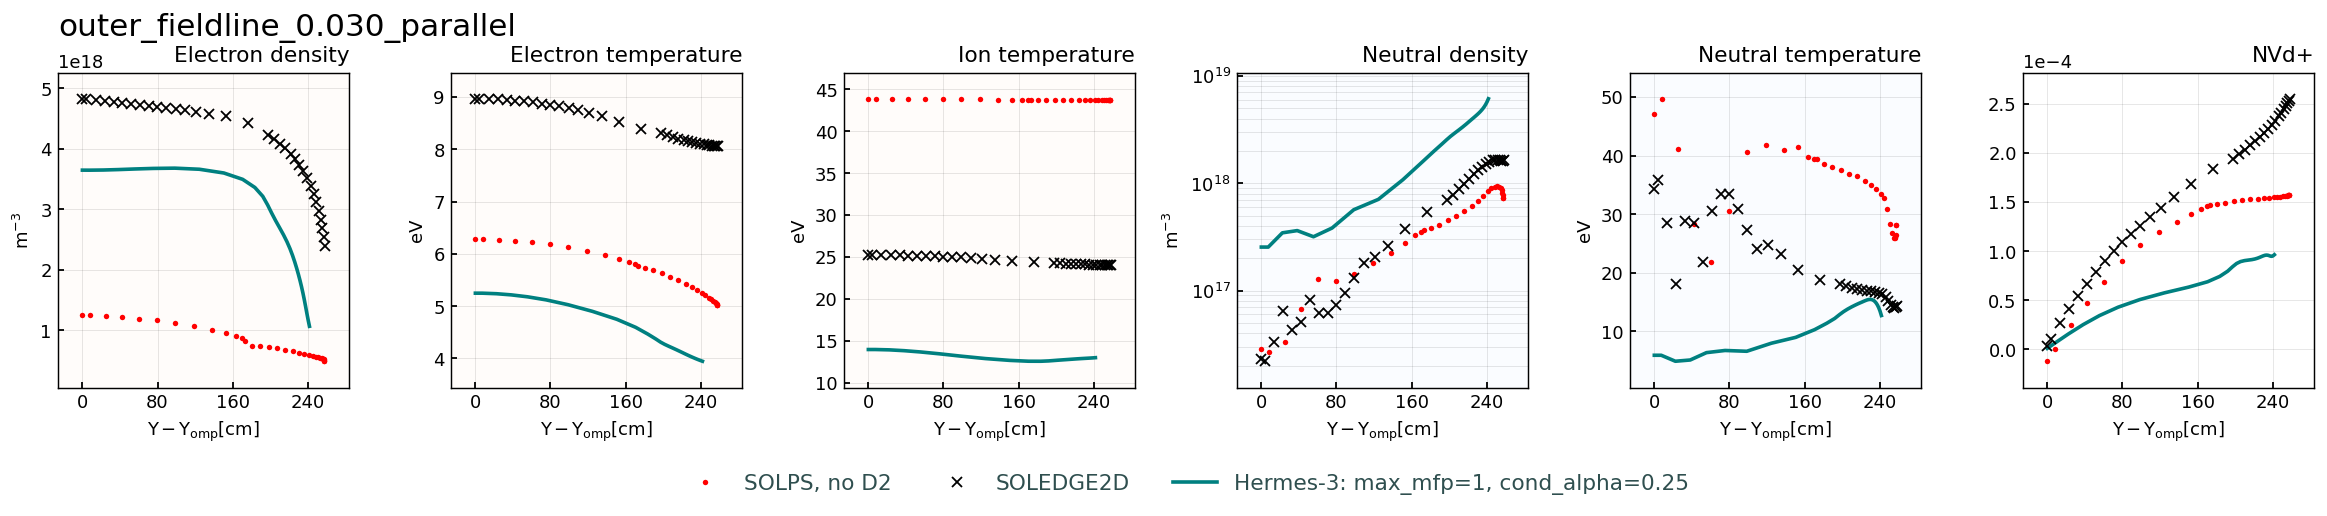

In [160]:
lineplot_compare(
    cases = { 

    "SOLPS, no D2" : dict(data=sp["tightwall_noD2_2e19_spectrum"], color="red"),
    "SOLEDGE2D" : dict(data=sl["tightwall_2e19"], color="black"),
    r"Hermes-3: max_mfp=1, cond_alpha=0.25" : dict(data=hr['2e19'], color = "teal"),

    },
    # regions = ["omp", "outer_lower", "outer_fieldline"],  
    regions = ["outer_fieldline_0.001_parallel", "outer_fieldline_0.015_parallel", "outer_fieldline_0.030_parallel"],  
    # regions = ["outer_fieldline", "outer_fieldline_parallel"],  
    params = ["Ne", "Te", "Td+", "Na", "Ta", "NVd+"],
    # params = ["Ne", "Te", "Td+", "Pe", "Pd+"],
    # params = ["Pe", "Pd+", "M", "NVd+", "Vd+"],
    # params = ["NVd+", "Vd+",  "M"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    ylims = (5e17, 2e20),
    lw = 2,
    legend_nrows = 1,
    combine_molecules = False
)

# Debug

inner_upper_target


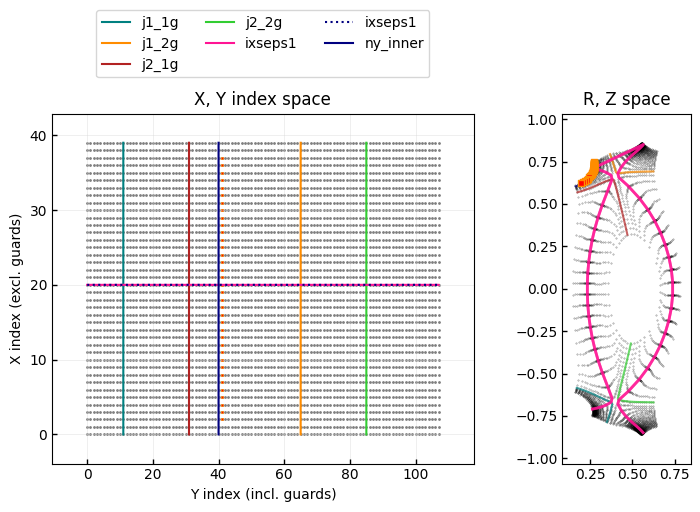

In [73]:
ds = cs["2e19"].ds.isel(t=-1)
region = "inner_upper_target"
params = ["Ne", "Te"]

if "midplane" in region:
    if average_midplanes:
        raise Exception("Averaging midplanes not implemented yet")
    elif not any([x in region for x in ["_a", "_b"]]):
        region = region + "_a"
    
print(region)
reg = ds.hermesm.select_region(region).squeeze()
plot_selection(ds, reg)
    
df = pd.DataFrame()
df["dr"] = reg["dr"].values

for i, _ in enumerate(df["dr"]):
    if i == 0:
        df.loc[i, "Srad"] = df.loc[i, "dr"] / 2
    else:
        df.loc[i, "Srad"] = df.loc[i-1, "Srad"] + df.loc[i-1, "dr"] + df.loc[i, "dr"]/2
    
df["sep"] = 0
df.loc[ds.metadata["ixseps1"], "sep"] = 1
dfsep = df[df["sep"] == 1]

df["Srad"] -= dfsep["Srad"].values

for param in params:
    df[param] = reg[param].values

# 1D radial data getter

In [102]:
ds = cs["2e19"].ds.isel(t=-1)
region = "outer_lower"
params = ["Ne", "Te"]

sepdist = 0.002
# reg = ds.hermesm.
    
# Find SOL ring nearest to requested distance
df = get_1d_radial_data(ds, [], "outer_midplane")
sepind = df[df["sep"] == 1].index[0]
sepadd = df.loc[(df["Srad"] - sepdist).abs().idxmin()].name - sepind

sepadd
# fig, ax = plt.subplots()
# ax.plot(df["Srad"] , df["Te"], marker = "o", ms = 2, lw = 1)
# plot_selection(ds, omp_a)

outer_midplane_a


3

In [161]:
ds = cs["2e19"].ds.isel(t=-1)

region = "outer_lower"
params = ["Ne", "Te", "Nd", "Td", "NVd+", "M"]
sepdist = 0.001
sepadd = None
target_first = False

def get_1d_poloidal_data(ds, params, region, sepdist = None, sepadd = 1, target_first = False):
    """
    Return a dataframe with data along a field line as well as poloidal and parallel connection lengths.
    Refer to get_custom_sol_ring for the indexing routine. 
    Select the field line by either sepdist or sepadd, but not both.
    Only supports one divertor leg at a time. 
    
    
    Parameters
    ----------
    ds : Dataset to use (must be loaded with guards)
    params : list of parameters to extract
    region : string, region to extract data from (inner_lower, inner_upper, outer_lower, outer_upper)
    sepdist : float, distance from separatrix to extract data from
    sepadd : int, SOL ring index to extract data from (starting from one after separatrix)
    target_first : bool, if True, reverse the dataframe so that 0 distance is at the target

    """

    reg = ds.hermesm.select_custom_sol_ring(region, sepadd = sepadd, sepdist = sepdist).squeeze()

    df = pd.DataFrame()
    df["Z"] = reg["Z"].values
    df["dpar"] = reg["dpol"] * abs(reg["Bxy"] / abs(reg["Bpxy"]))  # Parallel cell width
    df["Spol"] = reg["dpol"].cumsum()   # Poloidal connection length
    df["Spar"] = df["dpar"].cumsum()   # Parallel connection length

    for param in params:
        df[param] = reg[param].values
        
    # Ensure inner starts at midplane
    if "inner" in region:
        df["Spol"] = df["Spol"].iloc[-1] - df["Spol"]
        df["Spar"] = df["Spar"].iloc[-1] - df["Spar"]
        df = df.iloc[::-1].reset_index(drop = True)

    # Interpolate start of field line onto Z = 0  (between midplane_a and midplane_b)
    for param in df.columns.drop("Z"):
        interp = scipy.interpolate.interp1d(df["Z"], df[param], kind = "linear")
        df.loc[0, param] = interp(0)
    df.loc[0,"Z"] = 0  

    df["Spol"] -= df["Spol"].iloc[0]   # Now 0 is at Z = 0
    df["Spar"] -= df["Spar"].iloc[0]   # Now 0 is at Z = 0
            
    if target_first:
        df["Spol"] = df["Spol"].iloc[-1] - df["Spol"]
        df["Spar"] = df["Spar"].iloc[-1] - df["Spar"]
        df = df.iloc[::-1]
        
    return df
            
df = get_1d_poloidal_data(ds, params, region, sepdist = sepdist, sepadd = sepadd, target_first = target_first)
# df
fig, ax = plt.subplots()
ax.plot(df["Spar"], df["Te"], marker = "o")
# df
# df["dpol"]
# plot_selection(ds, reg)

outer_midplane_a


KeyError: 'M'

# SOLPS comparison - radial

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


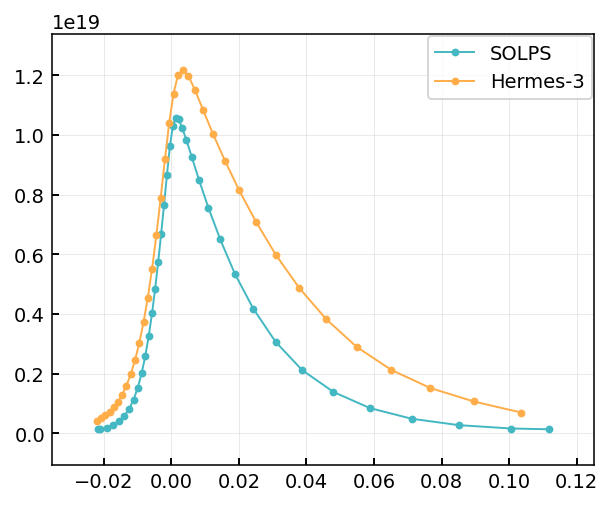

In [283]:
spc = SOLPScase(solpscases["tightwall_noD2_2e19_spectrum"])
slc = SOLEDGEcase(soledgecases["tightwall_2e19"])

dfsp = spc.get_1d_radial_data(["Te", "Ne", "NVd+"], region = "outer_lower_target")
# dfsl = slc.get_1d_radial_data(["Tempe", "Dense"], region = "outer_lower_target")
dfh = get_1d_radial_data(ds.isel(t=-1), ["Te", "Ne", "NVd+"], region = "outer_lower_target")

fig, ax = plt.subplots()
ax.plot(dfsp["dist"], dfsp["Ne"], marker = "o", ms = 3, lw = 1, label = "SOLPS")
# ax.plot(dfsl["dist"], dfsl["Ne"], marker = "o", ms = 3, lw = 1, label = "SOLEDGE")
ax.plot(dfh["Srad"], dfh["Ne"], marker = "o", ms = 3, lw = 1, label = "Hermes-3")
ax.legend()

# Pick SOL rings again

In [15]:
ds = cs["2e19"].ds.isel(t=-1, x = slice(2,-2))
ds["Na"] = ds["Nd"]
slc = SOLEDGEcase(path = soledgecases["tightwall_2e19"])
spc = SOLPScase(path = solpscases["tightwall_noD2_2e19_spectrum"])

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


In [ ]:
df_sl = slc.get_1d_radial_data(params = ["Dense", "Tempe"])
df_sl.rename(columns = {"Dense" : "Ne", "Tempe" : "Te"}, inplace = True)
df_sp = spc.get_1d_radial_data(params = ["Te", "Ne"], region = "omp")
df_hr = get_1d_radial_data(ds, params = ["Te", "Ne", "R", "Z"], region = "omp")

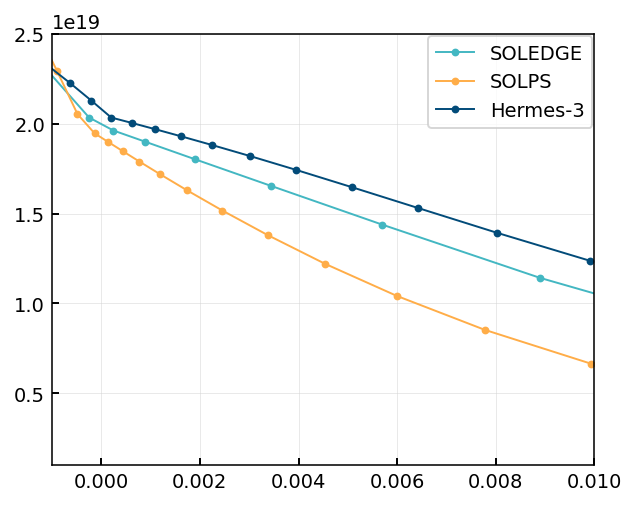

In [45]:
fig, ax = plt.subplots()
ax.plot(df_sl["dist"], df_sl["Ne"], marker = "o", ms = 3, lw = 1, label = "SOLEDGE")
ax.plot(df_sp["dist"], df_sp["Ne"], marker = "o", ms = 3, lw = 1, label = "SOLPS")
ax.plot(df_hr["Srad"], df_hr["Ne"], marker = "o", ms = 3, lw = 1, label = "Hermes-3")

ax.set_xlim(-0.001, 0.010)
ax.set_ylim(0.1e19, 2.5e19)
ax.legend()


# SOLPS comparison - parallel

,Ne,dist,R,Z
0,1.733430e+19,-0.068676,0.232663,0.000000
1,1.733128e+19,-0.160139,0.232898,-0.027115
2,1.734036e+19,-0.320896,0.234450,-0.074621
3,1.735774e+19,-0.482399,0.237507,-0.121800
4,1.738472e+19,-0.644710,0.242159,-0.168247


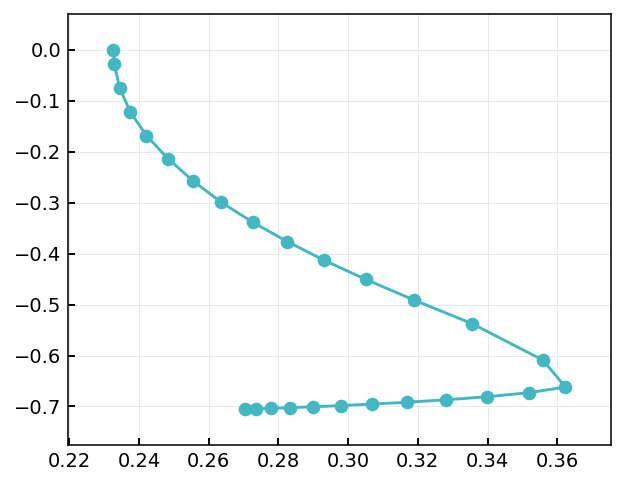

In [73]:
from soledge.wrapper_class import *
dfsl = soledge.get_1d_poloidal_data(["Ne"], parallel_length = True, d_from_sep = 0.001, region = "inner_lower")
display(dfsl.head())

plt.plot(dfsl["R"], dfsl["Z"], marker = "o")

None 0.003
Hermes-3: R = 0.741
SOLPS: R = 0.738
SOLEDGE2D: R = 0.741


Text(0.5, 1.0, 'sepdist: 0.003')

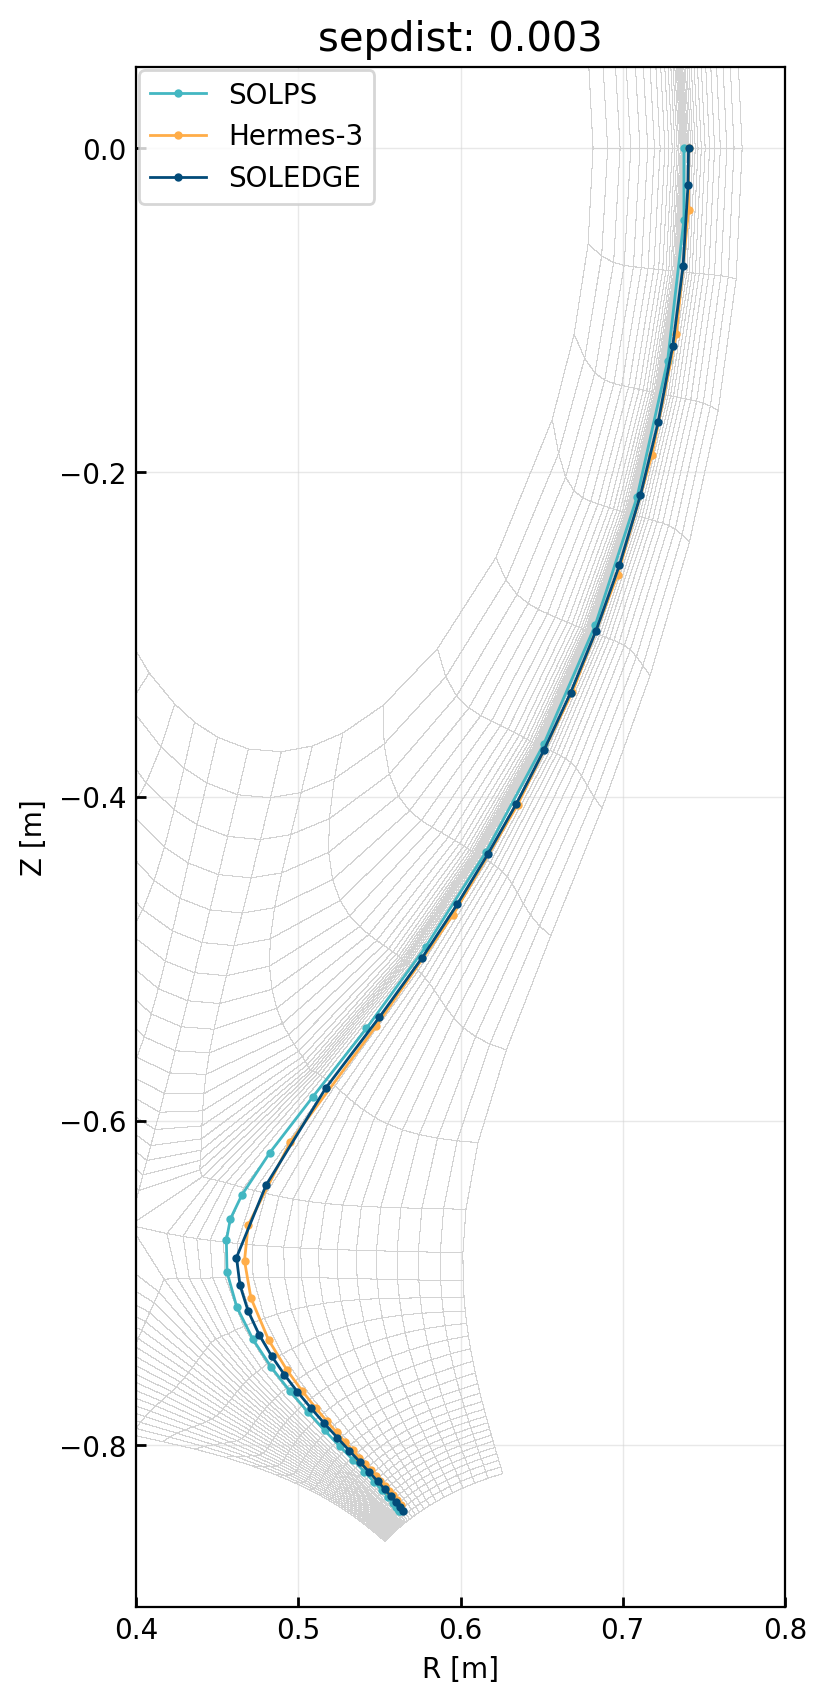

In [102]:
sepdist = 0.003

params = ["Na"]

dfsp = spc.get_1d_poloidal_data(params, region =  "outer_lower", sepdist = sepdist)
dfh = get_1d_poloidal_data(ds, ["R", "Z"] + params, region = "outer_lower", sepdist = sepdist)
dfsl = slc.get_1d_poloidal_data(params, parallel_length = True, d_from_sep = sepdist, region = "outer_upper")
dfsl["Z"] *= -1
dfs = {"Hermes-3":dfh, "SOLPS":dfsp, "SOLEDGE2D":dfsl}


for name, df in dfs.items():
    R = df.loc[0, "R"]
    print(f"{name}: R = {R:.3f}")
    
fig, ax = plt.subplots(figsize = (25,10), dpi = 200)

ds["Te"].bout.polygon(ax = ax, 
                      add_colorbar = False, separatrix = False, grid_only = True,
                      linecolor = "lightgrey", linewidth = 0.01)

style = dict(marker = "o", ms = 2, lw = 1)
ax.plot(dfsp["R"], dfsp["Z"], **style, label = "SOLPS")
ax.plot(dfh["R"], dfh["Z"], **style, label = "Hermes-3")
ax.plot(dfsl["R"], dfsl["Z"], **style, label = "SOLEDGE")
ax.legend()
ax.set_aspect("equal")
ax.set_xlim(0.4, 0.8)
ax.set_ylim(-0.9, 0.05)
ax.set_title(f"sepdist: {sepdist}", fontsize = "x-large")


None 0.001


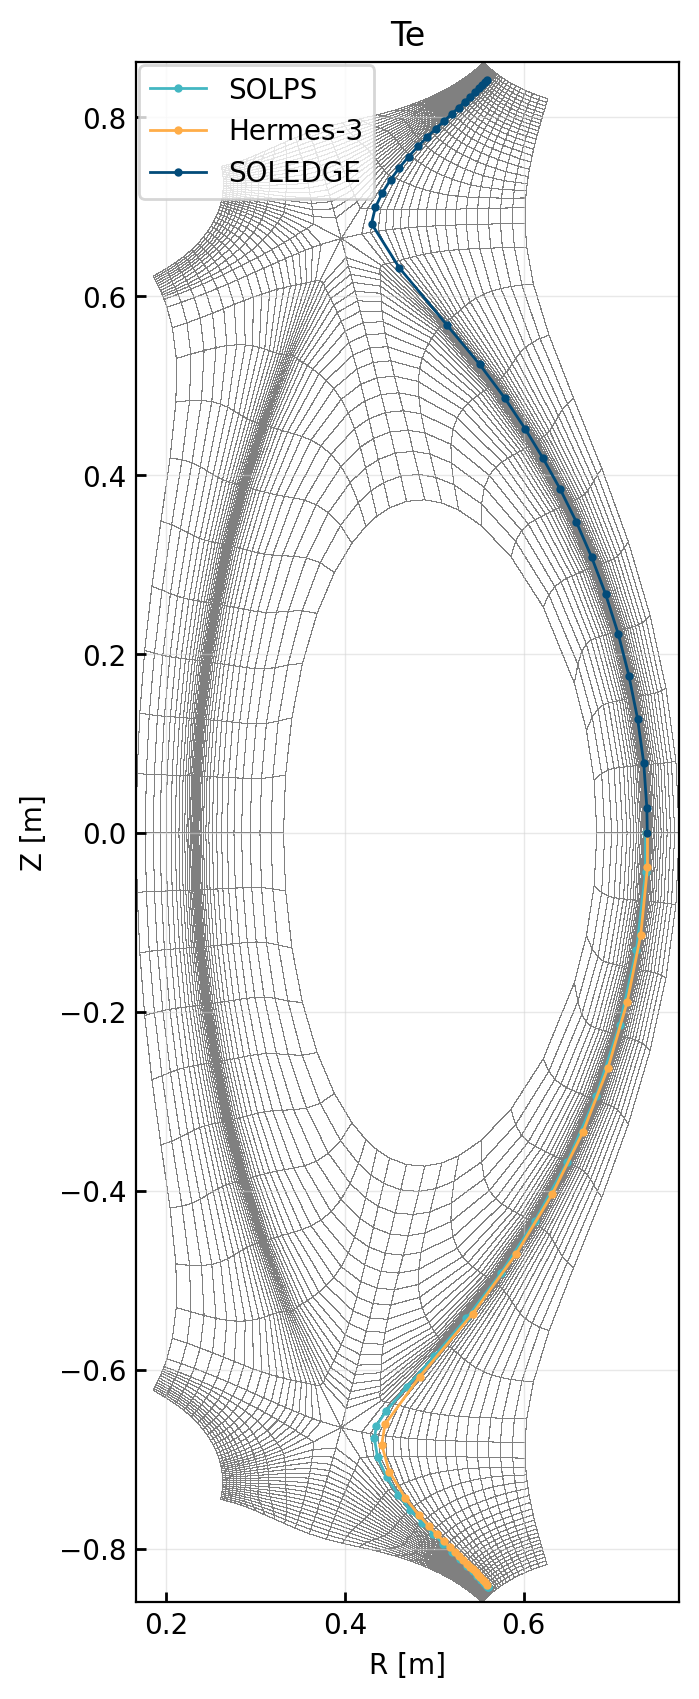

In [ ]:
dfsp = spc.get_1d_poloidal_data(["Te", "Td+", "Td", "Ne", "NVd+"], region =  "outer_lower", sepdist = 0.001)
dfh = get_1d_poloidal_data(ds, ["R", "Z", "Te", "Td+", "Td", "Ne", "NVd+"], region = "outer_lower", sepdist = 0.001)
dfsl = slc.get_1d_poloidal_data(["Dense", "Tempe"], parallel_length = True, d_from_sep = 0.001)



fig, ax = plt.subplots(figsize = (25,10), dpi = 200)
style = dict(marker = "o", ms = 2, lw = 1)
ax.plot(dfsp["R"], dfsp["Z"], **style, label = "SOLPS")
ax.plot(dfh["R"], dfh["Z"], **style, label = "Hermes-3")
ax.plot(dfsl["R"], dfsl["Z"]*-1, **style, label = "SOLEDGE")
ax.legend()
ax.set_aspect("equal")



In [62]:
import netCDF4 as nc
ds = nc.Dataset(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a4f2-allflux.nc")

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


2 None


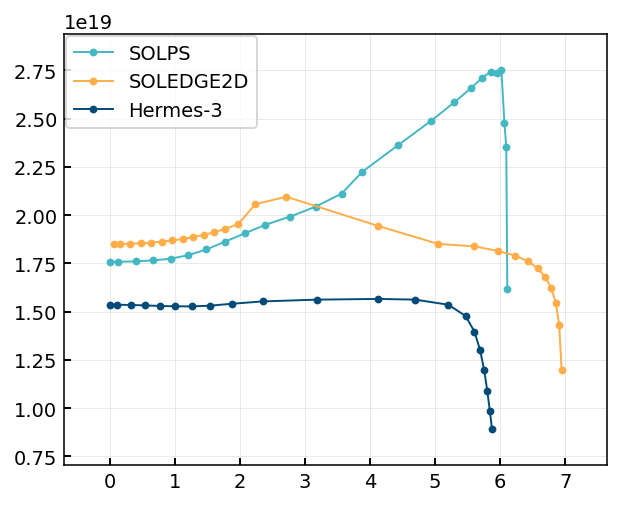

In [12]:
spc = SOLPScase(solpscases["tightwall_noD2_2e19_spectrum"])
slc = SOLEDGEcase(os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"))

if "t" in ds.dims: ds = ds.isel(t=-1)
sepdist = 0.0005
dfsp = spc.get_1d_poloidal_data(["Te", "Td+", "Td", "Ne", "NVd+"], region =  "inner_lower", sepdist = 0.0014)
dfh = get_1d_poloidal_data(ds, ["Te", "Td+", "Td", "Ne", "NVd+"], region = "inner_lower", sepadd = 2)
dfsl = slc.get_1d_poloidal_data(["Dense", "Tempe"], region = "inner_lower", parallel_length = True, d_from_sep = 0.0009)

fig, ax = plt.subplots()
ax.plot(dfsp["Spar"], dfsp["Ne"], marker = "o", ms = 3, lw = 1, label = "SOLPS")
ax.plot(dfsl["dist"], dfsl["Dense"], marker = "o", ms = 3, lw = 1, label = "SOLEDGE2D")
ax.plot(dfh["Spar"], dfh["Ne"], marker = "o", ms = 3, lw = 1, label = "Hermes-3")
ax.legend()

In [10]:
dfsl

,Dense,Tempe,dist,R,Z
0,1.851626e+19,72.268106,-0.068363,0.233732,0.000000
1,1.851191e+19,72.267784,-0.159409,0.233968,-0.027096
2,1.852328e+19,72.267206,-0.319434,0.235525,-0.074568
3,1.854605e+19,72.266639,-0.480217,0.238593,-0.121710
4,1.858121e+19,72.266122,-0.641806,0.243268,-0.168111
5,1.863134e+19,72.265705,-0.804655,0.249421,-0.213059
6,1.869064e+19,72.265409,-0.963847,0.256577,-0.256383
7,1.876539e+19,72.265293,-1.123126,0.264672,-0.298218
8,1.886245e+19,72.265421,-1.283430,0.273898,-0.338079
9,1.897998e+19,72.265816,-1.444091,0.283890,-0.375981


In [217]:
spc.bal["tab2"].shape

(117, 38, 1)

In [ ]:
df = get_1d_radial_data(ds, [], "outer_midplane")
sepind = df[df["sep"] == 1].index[0]
sepadd = df.loc[(df["Srad"] - sepdist).abs().idxmin()].name - sepind

In [201]:
sepdist = 0.001

radial_df = spc.get_1d_radial_data([], region = "omp")
sepind = radial_df[radial_df["sep"] == 1].index[0]
sepadd = radial_df.loc[(radial_df["dist"] - sepdist).abs().idxmin()].name - sepind

sepadd

2